# Systematic Risk, Beta Factor and the CAPM Model

## Recap and Motivation

Portfolio Risk seems to be much lower than the weighted average of its constituents -> __Diversification Effect!!!__

> In this figure, see the __Dwe jones risk__, compare to __its constituents risk__. this is the visual example to the diversification risk.

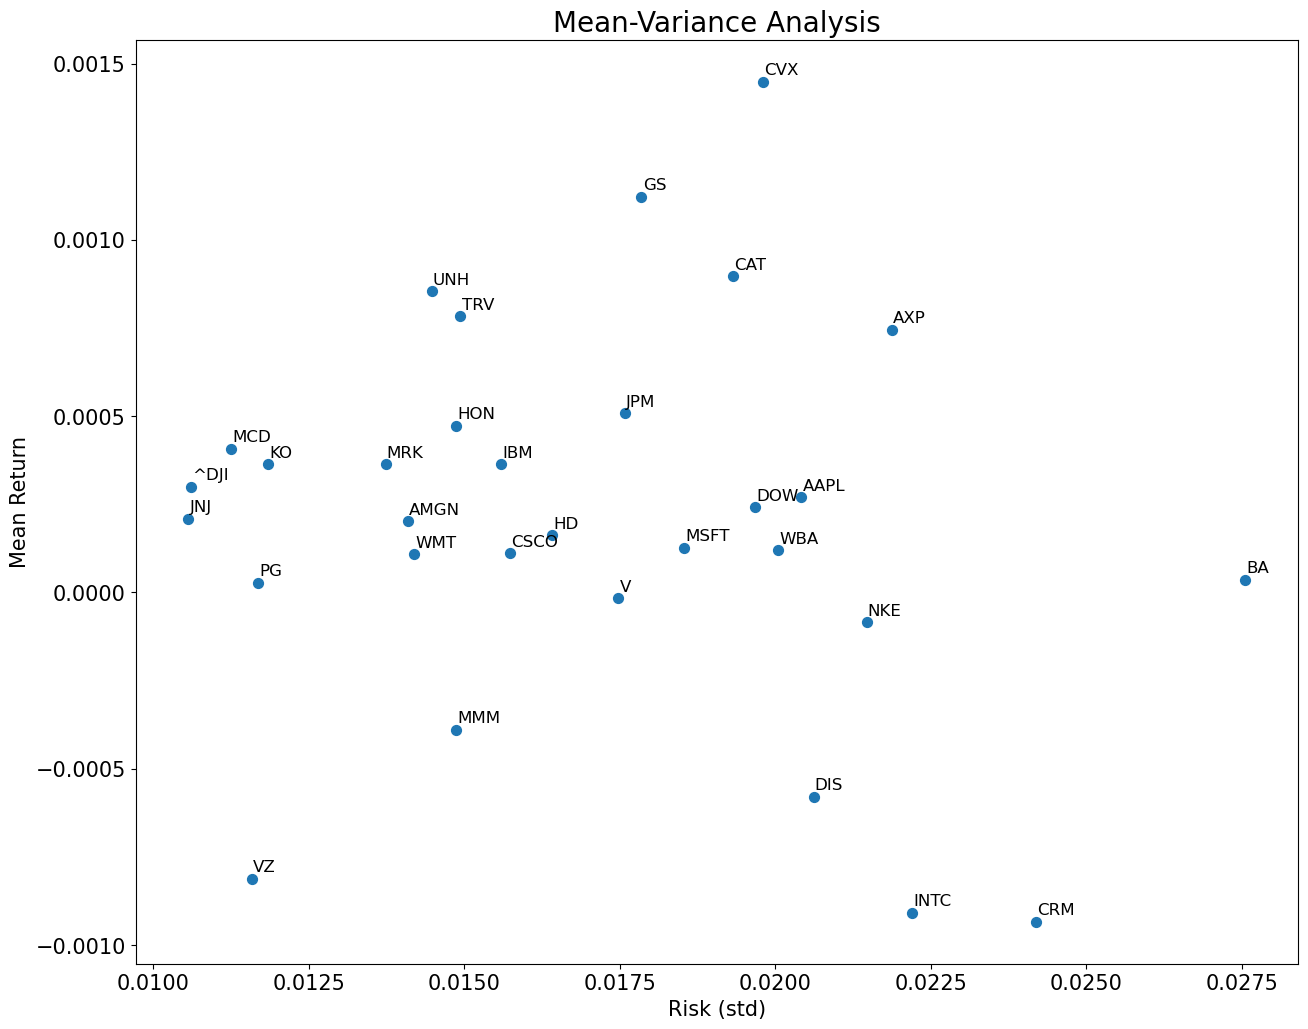

- In a diversified Portfolio, parts of a stock´s total risk __can be eliminated__.  (__unsystematic__/diversifiable risk) 
- In a diversified Portfolio, parts of a stock´s total risk __can´t be eliminated__ (__systematic risk__)
- How to __measure/quantify__ systematic risk (market risk)?

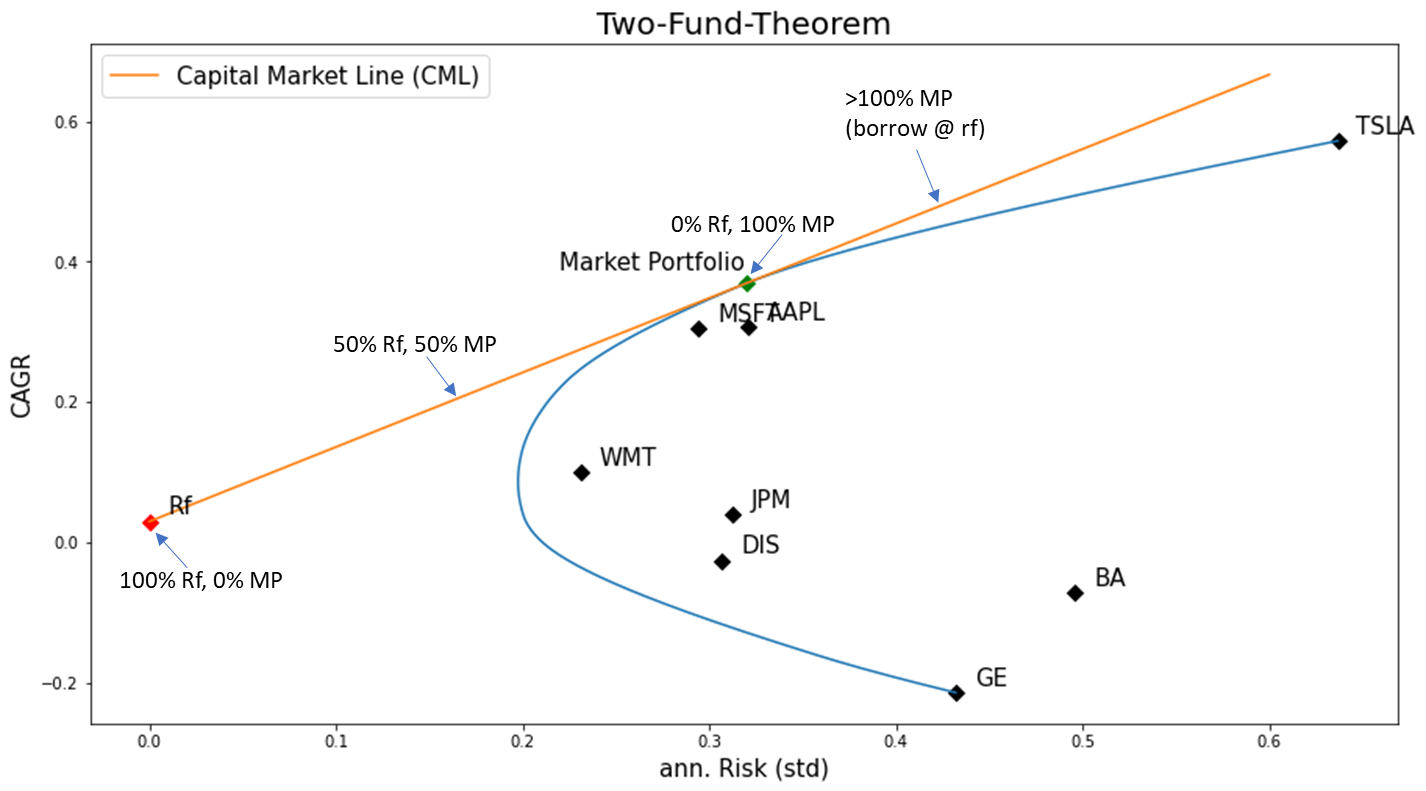

- All investors should hold a __diversified Portfolio__ (Market Portfolio)
- Investors shouldn´t care about a stock´s diversifiable risk.
- Stock investors should __only get compensated for taking systematic/market risk__. 
- For single stocks, the __relationship between market risk and return__ should be more meaningful (CAPM model)
- __Motivation: CAPM can be helpful to predict stock returns.__ (ex ante)
- __Motivation: CAPM can be helpful to measure and assess single Stock Performance (Benchmarking)__ (ex post)

# Getting started

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
prices = pd.read_csv("Stocks.csv", index_col = "Date", parse_dates = ["Date"])
prices

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [4]:
returns = prices.pct_change().dropna() 
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
2017-07-11,0.003240,0.011326,0.002413,0.013057,-0.003863,0.000143,0.035343,0.003277
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [5]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-07-05 to 2022-06-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1257 non-null   float64
 1   BA      1257 non-null   float64
 2   DIS     1257 non-null   float64
 3   GE      1257 non-null   float64
 4   JPM     1257 non-null   float64
 5   MSFT    1257 non-null   float64
 6   TSLA    1257 non-null   float64
 7   WMT     1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


---

# Portfolio Optimization (Optimizing the past)

Goal: Get the Market Portfolio (ex post)

In [6]:
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

In [7]:
rf = 0.03

In [8]:
returns 

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033
...,...,...,...,...,...,...,...,...
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032
2022-06-28,-0.0298,-0.0001,-0.0071,-0.0124,-0.0048,-0.0317,-0.0500,-0.0141


In [9]:
# exception: use mean of simple returns (linearity)
def port_ret(weights):
    simple_ret = returns.dot(weights.T)
    return simple_ret.mean() * 252

In [10]:
# calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.dot(weights.T)
    return simple_ret.std() * np.sqrt(252)

In [11]:
# define function to be minimized (sco only supports minimize, not maximize)
def sharpe(weights): 
     return -(port_ret(weights) - rf) / port_vol(weights) 

In [12]:
# number of assets
noa = len(returns.columns)
noa

8

In [13]:
# equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [14]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [15]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [16]:
# run optimization based on function to be minimized, 
# starting with equal weights and based on respective bounds and constraints
# Finding the optimal weights for shrap ratio
# (the ratio between return & risk.)
opts = sco.minimize(sharpe, 
                    eweigths, 
                    method = "SLSQP", 
                    bounds = bnds, 
                    constraints= cons)

In [17]:
#output of optimization
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1454361035655383
       x: [ 2.303e-01  1.621e-16  0.000e+00  0.000e+00  2.958e-16
            4.219e-01  2.944e-01  5.343e-02]
     nit: 10
     jac: [-9.167e-02  6.368e-01  4.352e-01  9.656e-01  2.289e-01
           -9.220e-02 -9.220e-02 -9.110e-02]
    nfev: 92
    njev: 10

In [18]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.2303048 , 0.        , 0.        , 0.        , 0.        ,
       0.42186895, 0.29439527, 0.05343098])

In [19]:
optimal_weights = pd.Series(data = optimal_weights, 
                            index = returns.columns
                        ).sort_values(ascending = False)
optimal_weights

MSFT   0.4219
TSLA   0.2944
AAPL   0.2303
WMT    0.0534
JPM    0.0000
BA     0.0000
DIS    0.0000
GE     0.0000
dtype: float64

In [20]:
# Compute the market portfolio 
# Why is the market portfolio ? because we assume that the market portfolio
# have the optimal weigths that give the best sharp ratio.
# So, for estimate the Market portfolio, we multiply the 
# return of the assets with the optimal weights 
# (the optimal weigths that we found, that can represent the Market portfolio.) 
returns["MP"] =  returns.dot(optimal_weights.T)
returns

# So this is the return of the Market portfolio:

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005,-0.0148
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020,-0.0216
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019,0.0119
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279,0.0057
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033,0.0114
...,...,...,...,...,...,...,...,...,...
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008,0.0334
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032,-0.0052
2022-06-28,-0.0298,-0.0001,-0.0071,-0.0124,-0.0048,-0.0317,-0.0500,-0.0141,-0.0357


In [21]:
# Compute the annualize risk & return
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    summary["ann. Return"] = returns_df.mean() * 252 # mean of simple returns
    return summary

In [22]:
# Let's calculate the annualize risk & return of the returns of the Market Portfilio
summary = ann_risk_return(returns)
summary

,ann. Risk,ann. Return
AAPL,0.3207,0.3198
BA,0.4958,0.0481
DIS,0.3069,0.0208
GE,0.4320,-0.1470
JPM,0.3123,0.0875
MSFT,0.2942,0.3093
TSLA,0.6367,0.6546
WMT,0.2311,0.1225
MP,0.3260,0.4034


In [23]:
# Calculate the sharp ratio of the assets, and also of the Market portfolio.
summary["Sharpe"] = (summary["ann. Return"] - rf) / summary["ann. Risk"]
summary

# annualize risk | annualize return | Sharp ratio 

,ann. Risk,ann. Return,Sharpe
AAPL,0.3207,0.3198,0.9037
BA,0.4958,0.0481,0.0366
DIS,0.3069,0.0208,-0.0301
GE,0.4320,-0.1470,-0.4097
JPM,0.3123,0.0875,0.1842
MSFT,0.2942,0.3093,0.9496
TSLA,0.6367,0.6546,0.9810
WMT,0.2311,0.1225,0.4004
MP,0.3260,0.4034,1.1454


---

# Systematic and Unsystematic Risk

- So far we have the __anuualize returh, anuualize risk, and Sharp ratio__ of the assets and of the optimzed Market Portfolio. 
    - Now, lets split the risk to **Systematic and Unsystematic Risk**.


> __Systematic risk,__ also known as market risk or undiversifiable risk, is the risk that is inherent to the entire market or a market segment. It cannot be eliminated through diversification because it is related to macroeconomic factors affecting all assets.


> __Unsystematic risk__, also known as idiosyncratic risk or diversifiable risk, is the risk specific to an individual asset or a particular group of assets. It can be diversified away by holding a diversified portfolio of assets.

__Market Risk (systematic Risk)__: global economy, market or industry/segment-specific risk factors that apply to many companies.

__Unsystematic Risk__: company-specific risk-factors (e.g. management) -> "Elon Musk Risk"

In [24]:
# For simplify math, we suold work with the variance (apply std^2)
# We compute the total risk of each individual asset. 
summary["TotalRisk_var"] = summary["ann. Risk"]**2 
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var
AAPL,0.3207,0.3198,0.9037,0.1029
BA,0.4958,0.0481,0.0366,0.2458
DIS,0.3069,0.0208,-0.0301,0.0942
GE,0.4320,-0.1470,-0.4097,0.1866
JPM,0.3123,0.0875,0.1842,0.0975
MSFT,0.2942,0.3093,0.9496,0.0865
TSLA,0.6367,0.6546,0.9810,0.4054
WMT,0.2311,0.1225,0.4004,0.0534
MP,0.3260,0.4034,1.1454,0.1063


In [25]:
# Compute the covatiance matrix of the returns. 
cov_matrix = returns.cov() * 252
cov_matrix

# This is the convatiance matrix of all the possible interaction of the
# assets.

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
AAPL,0.1029,0.0674,0.0439,0.0473,0.0462,0.0715,0.0926,0.0264,0.0825
BA,0.0674,0.2458,0.0829,0.1190,0.0952,0.0615,0.1029,0.0190,0.0728
DIS,0.0439,0.0829,0.0942,0.0605,0.0587,0.0441,0.0566,0.0170,0.0463
GE,0.0473,0.1190,0.0605,0.1866,0.0777,0.0413,0.0635,0.0145,0.0478
JPM,0.0462,0.0952,0.0587,0.0777,0.0975,0.0450,0.0527,0.0190,0.0461
MSFT,0.0715,0.0615,0.0441,0.0413,0.0450,0.0865,0.0852,0.0268,0.0795
TSLA,0.0926,0.1029,0.0566,0.0635,0.0527,0.0852,0.4054,0.0210,0.1778
WMT,0.0264,0.0190,0.0170,0.0145,0.0190,0.0268,0.0210,0.0534,0.0264
MP,0.0825,0.0728,0.0463,0.0478,0.0461,0.0795,0.1778,0.0264,0.1063


__Weighted average covariance of constituents with Market Portfolio__

In [26]:
cov_matrix.iloc[:-1, -1].dot(optimal_weights)

0.10628119086290919

__Total Risk of Market Portfolio__

In [27]:
cov_matrix.iloc[-1, -1]

0.10628119086290912

> __Total Risk of Market Portfolio = Weighted average covariance of constituents with Market Portfolio__

__In a diversified Portfolio (MP):__

- __only a Stock´s systematic Risk (cov with MP, "Market Risk") contributes to the Total Portfolio Risk!__
- __a Stock´s unsystematic Risk can be eliminated!__  

In [28]:
# So the systematick risk, is basically the weigthed avarage covariance
# of each asset in the portfolio - with the portfolio itself (Market Portfolio) 
summary["SystRisk_var"] = cov_matrix.iloc[:, -1]
summary


,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var
AAPL,0.3207,0.3198,0.9037,0.1029,0.0825
BA,0.4958,0.0481,0.0366,0.2458,0.0728
DIS,0.3069,0.0208,-0.0301,0.0942,0.0463
GE,0.4320,-0.1470,-0.4097,0.1866,0.0478
JPM,0.3123,0.0875,0.1842,0.0975,0.0461
MSFT,0.2942,0.3093,0.9496,0.0865,0.0795
TSLA,0.6367,0.6546,0.9810,0.4054,0.1778
WMT,0.2311,0.1225,0.4004,0.0534,0.0264
MP,0.3260,0.4034,1.1454,0.1063,0.1063


In [29]:
# Compute the unsystematick risk (the different between the total and systematic)
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.3207,0.3198,0.9037,0.1029,0.0825,0.0203
BA,0.4958,0.0481,0.0366,0.2458,0.0728,0.1730
DIS,0.3069,0.0208,-0.0301,0.0942,0.0463,0.0479
GE,0.4320,-0.1470,-0.4097,0.1866,0.0478,0.1388
JPM,0.3123,0.0875,0.1842,0.0975,0.0461,0.0514
MSFT,0.2942,0.3093,0.9496,0.0865,0.0795,0.0071
TSLA,0.6367,0.6546,0.9810,0.4054,0.1778,0.2276
WMT,0.2311,0.1225,0.4004,0.0534,0.0264,0.0270
MP,0.3260,0.4034,1.1454,0.1063,0.1063,0.0000


__Plot the Systematic risk and the Unsystenatic risk__

- __`Unsystematic risk`__: is the risk of each __individual asset!__ this is a risk that we can eliminate (e.g by build Portfolio..)!
- __`Systenatic risk`__: is the risk of the the Market portfolio. this is a risk that we can't eliminate.

> __So by creating diversified portfolio, we eliminate the unsystematic risk! this is the effect of diversification__

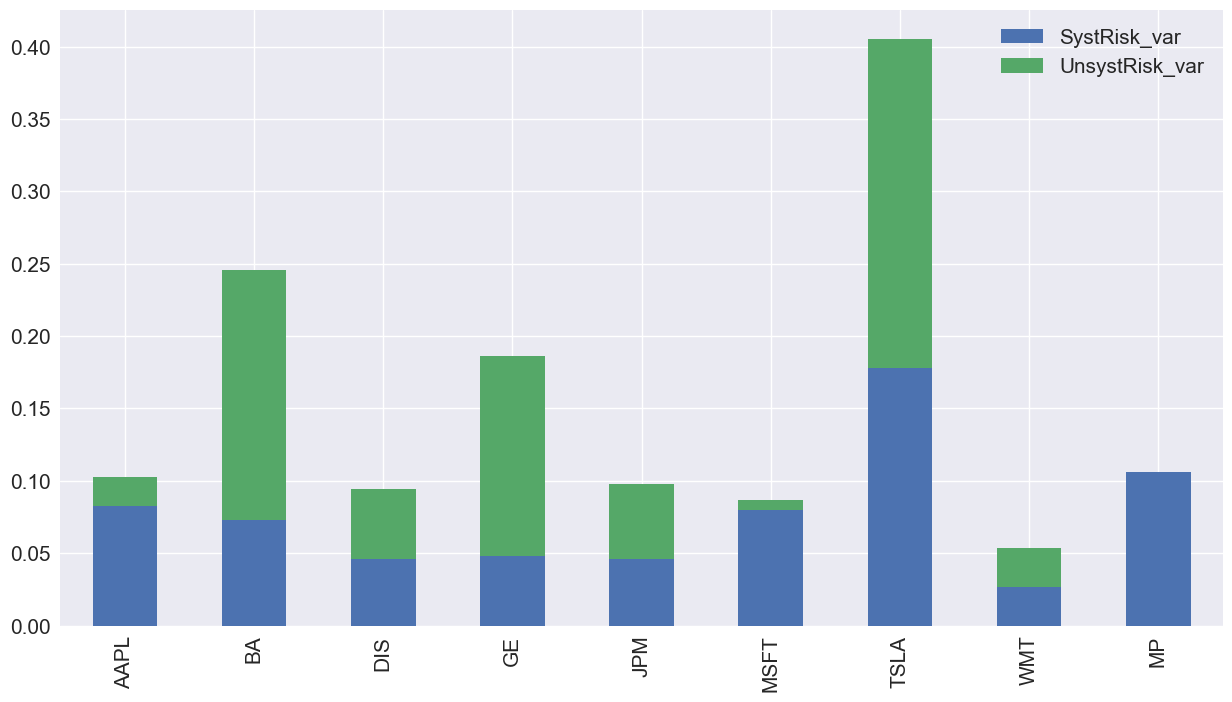

In [30]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__Market Risk (systematic Risk)__: global economy, market or industry/segment-specific risk factors that apply to many companies.

__Unsystematic Risk__: company-specific risk-factors (e.g. management) -> "Elon Musk Risk" -> cannot be eliminated by portfolio. 

In [31]:
rf = [0.03, 0] # 3% return, zero Risk

For __single stocks__, should __Total Risk__ matter...?

If you sucess to drew a line between the __risk free__ to the __Market Portfolio__, then this is the __Capital Market Line__. 

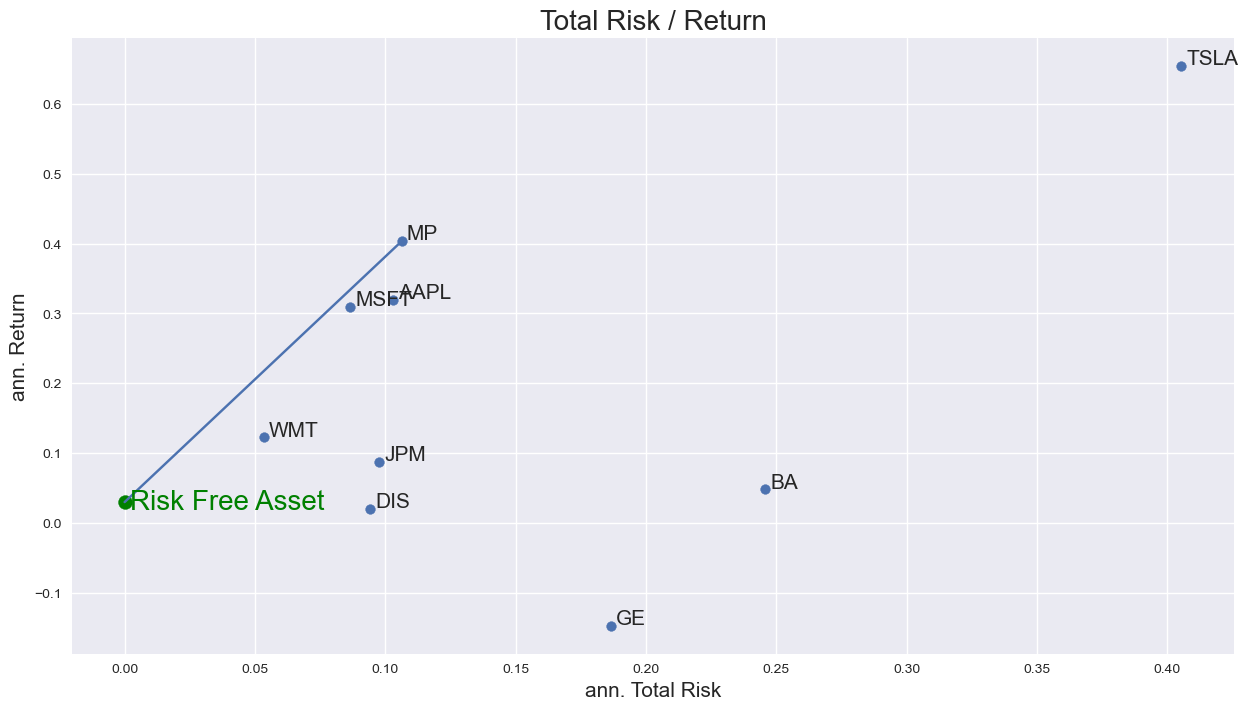

In [32]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary["ann. Return"])

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "ann. Return"]+0.002), size = 15)

plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "ann. Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

-> ...or only __systematic Risk__?

You can see that the assets that on the Capital Market Line, is the assets that got the most weigths in the Market Portfolio.

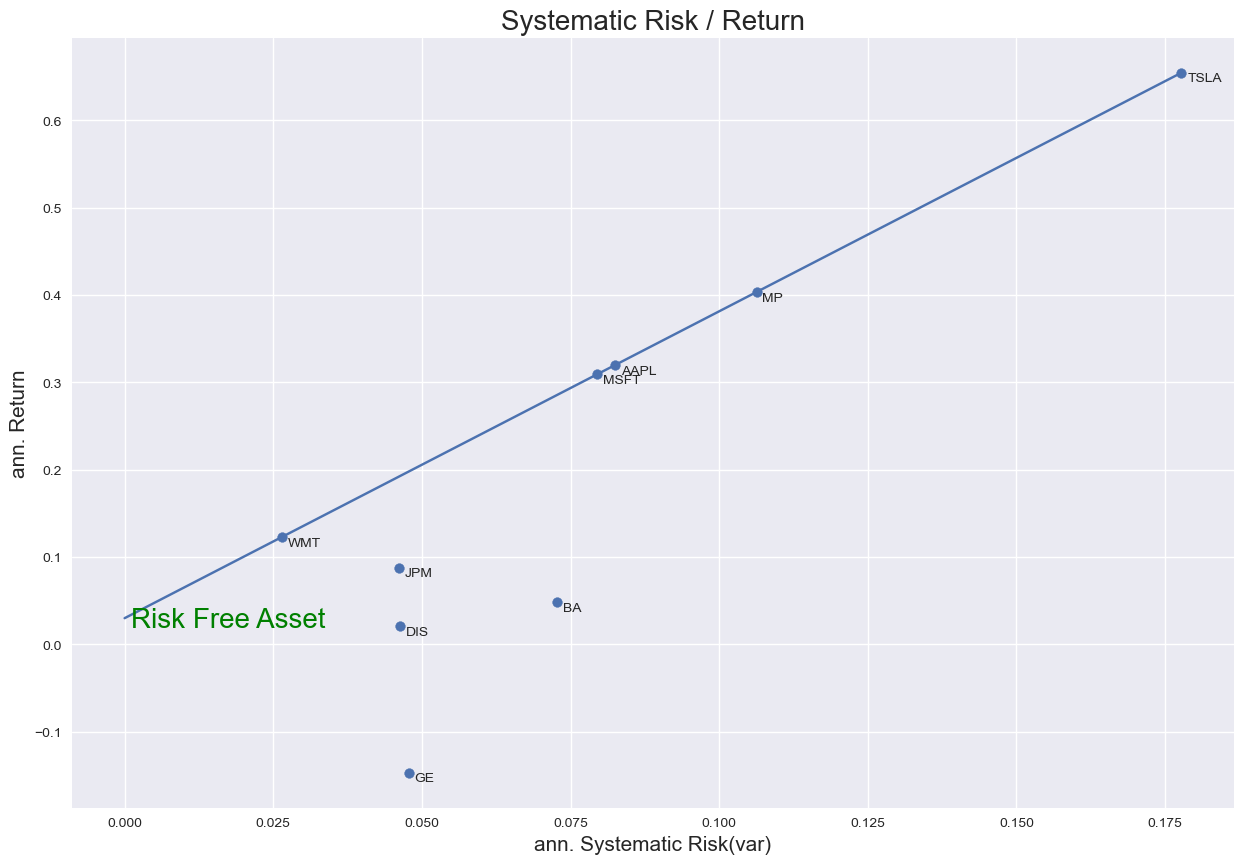

In [33]:
plt.figure(figsize = (15, 10))
plt.scatter(summary.SystRisk_var, summary["ann. Return"])

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "ann. Return"]-0.01), size = 10)
    
plt.plot([rf[1], summary.loc["TSLA", "SystRisk_var"]], [rf[0], summary.loc["TSLA", "ann. Return"]])
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

In [34]:
optimal_weights

MSFT   0.4219
TSLA   0.2944
AAPL   0.2303
WMT    0.0534
JPM    0.0000
BA     0.0000
DIS    0.0000
GE     0.0000
dtype: float64

- WMT, MSFT, AAPL and TSLA __fairly compensate Investors for taking Market Risk__.  
- JPM, DIS, BA and GE are not in the MP, because they __underperform in terms of (systemtic) Risk-adjusted Return__.

---

# CAPM & the Security Market Line
> The Security Market Line (SML) is a graphical representation of the Capital Asset Pricing Model (CAPM). The SML depicts the relationship between the expected return and systematic risk (beta) of an investment in a well-diversified portfolio. The CAPM and the SML are widely used tools in finance to help determine the expected return on an asset or portfolio.


__Here are the key components and concepts related to the Security Market Line:__

1. __Capital Asset Pricing Model (CAPM):__

    - The CAPM is a financial model that establishes a linear relationship between the expected return of an asset or a portfolio and its systematic risk (beta). 
    - The risk-free rate represents the return on a risk-free investment, and β is the asset's beta, a measure of its sensitivity to market movements.

2. __Security Market Line (SML):__

    - The Security Market Line is a graphical representation of the CAPM. It is a straight line that shows the relationship between the expected return on an asset or a portfolio and its beta.

    - The slope of the SML is the market risk premium, which represents the additional return investors expect for taking on one unit of systematic risk.

3. __Risk-Free Rate:__
    - The risk-free rate is the return on an investment with no risk of financial loss. It serves as the baseline return for risk-free assets and is a key input in the CAPM and SML.

4. __Market Risk Premium:__

    - The market risk premium is the excess return expected from investing in the overall market compared to the risk-free rate. It reflects the compensation investors require for taking on systematic risk.

5. __Beta:__
    - is a measure of an asset's or a portfolio's sensitivity to market movements. A beta of 1 indicates that the asset moves in line with the market, a beta less than 1 implies lower volatility, and a beta greater than 1 indicates higher volatility.


__Interpretation:__

> Any asset or portfolio that falls on the SML is considered to be appropriately priced for its level of systematic risk. If an asset lies above the SML, it is considered undervalued, while if it falls below, it is considered overvalued.

> The SML helps investors assess whether an investment's expected return is commensurate with its risk, as measured by its beta. It provides a tool for comparing the risk-return trade-off of different investments.

_In summary, the Security Market Line is a fundamental concept in finance that relates the expected return of an investment to its systematic risk, providing a framework for pricing assets based on their risk profile._

In [36]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.3207,0.3198,0.9037,0.1029,0.0825,0.0203
BA,0.4958,0.0481,0.0366,0.2458,0.0728,0.1730
DIS,0.3069,0.0208,-0.0301,0.0942,0.0463,0.0479
GE,0.4320,-0.1470,-0.4097,0.1866,0.0478,0.1388
JPM,0.3123,0.0875,0.1842,0.0975,0.0461,0.0514
MSFT,0.2942,0.3093,0.9496,0.0865,0.0795,0.0071
TSLA,0.6367,0.6546,0.9810,0.4054,0.1778,0.2276
WMT,0.2311,0.1225,0.4004,0.0534,0.0264,0.0270
MP,0.3260,0.4034,1.1454,0.1063,0.1063,0.0000


__Normalize Systematic Risk (divide by Total Market Risk)__ -> __beta factor__

In [80]:
summary.SystRisk_var

AAPL   0.0522
BA     0.0654
DIS    0.0422
GE     0.0492
JPM    0.0483
MSFT   0.0515
TSLA   0.0616
WMT    0.0217
MP     0.0429
Name: SystRisk_var, dtype: float64

In [81]:
summary.loc["MP", "TotalRisk_var"]

0.04287569125366171

In [37]:
# the beta is the slope that measure the sensitivy of the market movement.

# Compute the beta value of each asset! 
# The ratio between the systematic risk of each asset / total risk of Market Index
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "TotalRisk_var"]

# note: the total risk of Market Index its also the systematic risk.

## Let's interpret the Beta ## 
# Beta = 1: If the beta of an asset is 1, it means the asset has the same 
#           level of systematic risk as the overall market
#
#  
# Beta > 1: A beta greater than 1 indicates higher systematic risk. The asset's 
#           price tends to have larger fluctuations than the market in 
#           response to market movements.
#
# 
# Beta < 1: A beta less than 1 indicates lower systematic risk. The asset's 
#           price tends to have smaller fluctuations than the market in 
#           response to market movements.   


In [38]:
summary
# Now each asset have  its own Beta.        

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,0.3207,0.3198,0.9037,0.1029,0.0825,0.0203,0.7765
BA,0.4958,0.0481,0.0366,0.2458,0.0728,0.1730,0.6848
DIS,0.3069,0.0208,-0.0301,0.0942,0.0463,0.0479,0.4355
GE,0.4320,-0.1470,-0.4097,0.1866,0.0478,0.1388,0.4494
JPM,0.3123,0.0875,0.1842,0.0975,0.0461,0.0514,0.4342
MSFT,0.2942,0.3093,0.9496,0.0865,0.0795,0.0071,0.7479
TSLA,0.6367,0.6546,0.9810,0.4054,0.1778,0.2276,1.6725
WMT,0.2311,0.1225,0.4004,0.0534,0.0264,0.0270,0.2485
MP,0.3260,0.4034,1.1454,0.1063,0.1063,0.0000,1.0000


__Visualize the Beta and the return__

- __Beta = 1:__ If the beta of an asset is 1, it means the asset has the same 
          level of systematic risk as the overall market
 
- __Beta > 1:__ A beta greater than 1 indicates higher systematic risk. The asset's
          price tends to have larger fluctuations than the market in 
          response to market movements.
          
- __Beta < 1:__ A beta less than 1 indicates lower systematic risk. The asset's 
          price tends to have smaller fluctuations than the market in 
          response to market movements.   


__In General__:

>  assets __above__ the security line = outpreform the market

>  assets __below__ the security line = underperform the market

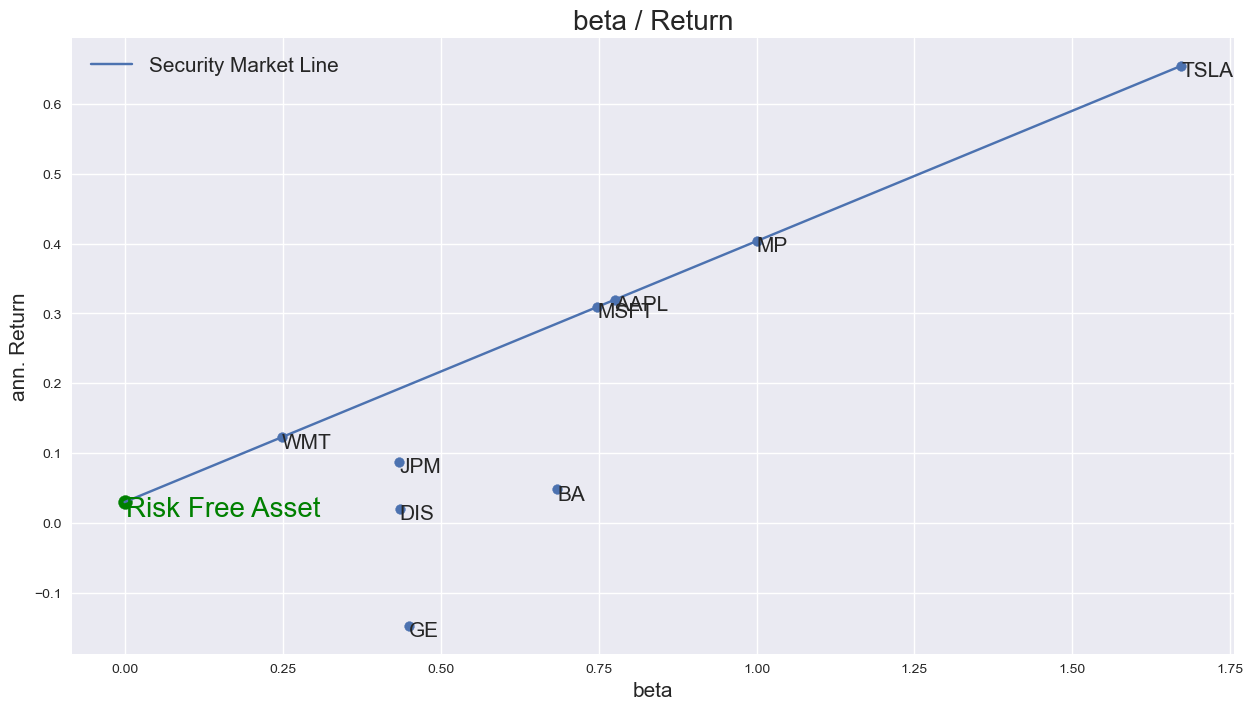

In [39]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["TSLA", "beta"]], [rf[0], summary.loc["TSLA", "ann. Return"]], label = "Security Market Line")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

__Linear Relationship between beta and Return__

y =      i  +         slope           * x

Return = RFR + (Market Portfolio Return - RFR) * beta

(By Definition, the Market Portfolio has a beta of 1!)

__-> Capital Asset Pricing Model (CAPM) Formula!__

__Interpretation__

- the `capm_ret` is a prediction of the future return of an asset.
- Now, if the `capm_ret` of an asset <= to annualize return of this asset, its mean that the asset is perform/out perform the security line. its a good sign ofcurse.  
    - > For example, by the `capm_ret`, **BA** actually need to return 28%, but the real return of **BA** is 4%. Its not a good sign, its mean that the asset **BA** is under the security line.

In [40]:
## Compute the CAPM if each asset: ##
 
# rf[0] -> return of free risk
# summary.loc["MP", "ann. Return"] -> anuualuze return of Market Index
# summary.beta -> the Beta's values   
summary["capm_ret"] = rf[0] + (summary.loc["MP", "ann. Return"] - rf[0]) * summary.beta

In [41]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AAPL,0.3207,0.3198,0.9037,0.1029,0.0825,0.0203,0.7765,0.3199
BA,0.4958,0.0481,0.0366,0.2458,0.0728,0.1730,0.6848,0.2857
DIS,0.3069,0.0208,-0.0301,0.0942,0.0463,0.0479,0.4355,0.1926
GE,0.4320,-0.1470,-0.4097,0.1866,0.0478,0.1388,0.4494,0.1978
JPM,0.3123,0.0875,0.1842,0.0975,0.0461,0.0514,0.4342,0.1921
MSFT,0.2942,0.3093,0.9496,0.0865,0.0795,0.0071,0.7479,0.3093
TSLA,0.6367,0.6546,0.9810,0.4054,0.1778,0.2276,1.6725,0.6545
WMT,0.2311,0.1225,0.4004,0.0534,0.0264,0.0270,0.2485,0.1228
MP,0.3260,0.4034,1.1454,0.1063,0.1063,0.0000,1.0000,0.4034


---

# Beta and Alpha

> Beta and alpha are key concepts in finance, particularly in the context of the Capital Asset Pricing Model (CAPM) and the evaluation of investment performance. Let's break down each concept:

__Beta:__
- β is a measure of a security's or a portfolio's sensitivity to market movements. It quantifies the systematic risk, indicating how much an asset's returns are expected to move in response to changes in the overall market.
    - __Interpretation:__
        - __β=1__: The asset has the same level of systematic risk as the overall market.
        - __β>1__: The asset is more volatile than the market (higher risk).
        - __β<1__: The asset is less volatile than the market (lower risk).
    - __Significance__:
        - Beta is a crucial input in the CAPM, helping to estimate the expected return for an asset or a portfolio.


__Alpha__
- Alpha (α) represents the excess return of an investment over its expected return, given its level of systematic risk (as measured by beta) according to the CAPM.
- Alpha is a measure of an investment manager's skill in generating returns above or below what would be expected based on the systematic risk.
    - __Interpretation__
        - __α>0__: Positive alpha indicates that the investment has outperformed its expected return, suggesting skill or favorable investment conditions.
        - __α<0__: Negative alpha indicates underperformance, suggesting that the investment has not met expectations given its risk.
    - __Significance:__
        - Positive alpha is often considered a measure of superior investment performance, while negative alpha may suggest underperformance.



In [42]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AAPL,0.3207,0.3198,0.9037,0.1029,0.0825,0.0203,0.7765,0.3199
BA,0.4958,0.0481,0.0366,0.2458,0.0728,0.1730,0.6848,0.2857
DIS,0.3069,0.0208,-0.0301,0.0942,0.0463,0.0479,0.4355,0.1926
GE,0.4320,-0.1470,-0.4097,0.1866,0.0478,0.1388,0.4494,0.1978
JPM,0.3123,0.0875,0.1842,0.0975,0.0461,0.0514,0.4342,0.1921
MSFT,0.2942,0.3093,0.9496,0.0865,0.0795,0.0071,0.7479,0.3093
TSLA,0.6367,0.6546,0.9810,0.4054,0.1778,0.2276,1.6725,0.6545
WMT,0.2311,0.1225,0.4004,0.0534,0.0264,0.0270,0.2485,0.1228
MP,0.3260,0.4034,1.1454,0.1063,0.1063,0.0000,1.0000,0.4034


__Jensen´s Alpha__: <br>
The Jensen's measure, or Jensen's alpha, is a __risk-adjusted performance measure__ that represents the average return on a portfolio or investment, __above or below that predicted by the capital asset pricing model (CAPM)__, given the portfolio's or investment's beta and the average market return. (Investopedia.com)

In [43]:
# alpha is the different between the annualize return of each and its CAPM!
summary["alpha"] = summary["ann. Return"] - summary.capm_ret
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,0.3207,0.3198,0.9037,0.1029,0.0825,0.0203,0.7765,0.3199,-0.0001
BA,0.4958,0.0481,0.0366,0.2458,0.0728,0.1730,0.6848,0.2857,-0.2376
DIS,0.3069,0.0208,-0.0301,0.0942,0.0463,0.0479,0.4355,0.1926,-0.1719
GE,0.4320,-0.1470,-0.4097,0.1866,0.0478,0.1388,0.4494,0.1978,-0.3448
JPM,0.3123,0.0875,0.1842,0.0975,0.0461,0.0514,0.4342,0.1921,-0.1046
MSFT,0.2942,0.3093,0.9496,0.0865,0.0795,0.0071,0.7479,0.3093,0.0001
TSLA,0.6367,0.6546,0.9810,0.4054,0.1778,0.2276,1.6725,0.6545,0.0001
WMT,0.2311,0.1225,0.4004,0.0534,0.0264,0.0270,0.2485,0.1228,-0.0003
MP,0.3260,0.4034,1.1454,0.1063,0.1063,0.0000,1.0000,0.4034,0.0000


-> __Vertical Distance between a Stock´s Return and the Security Market Line__

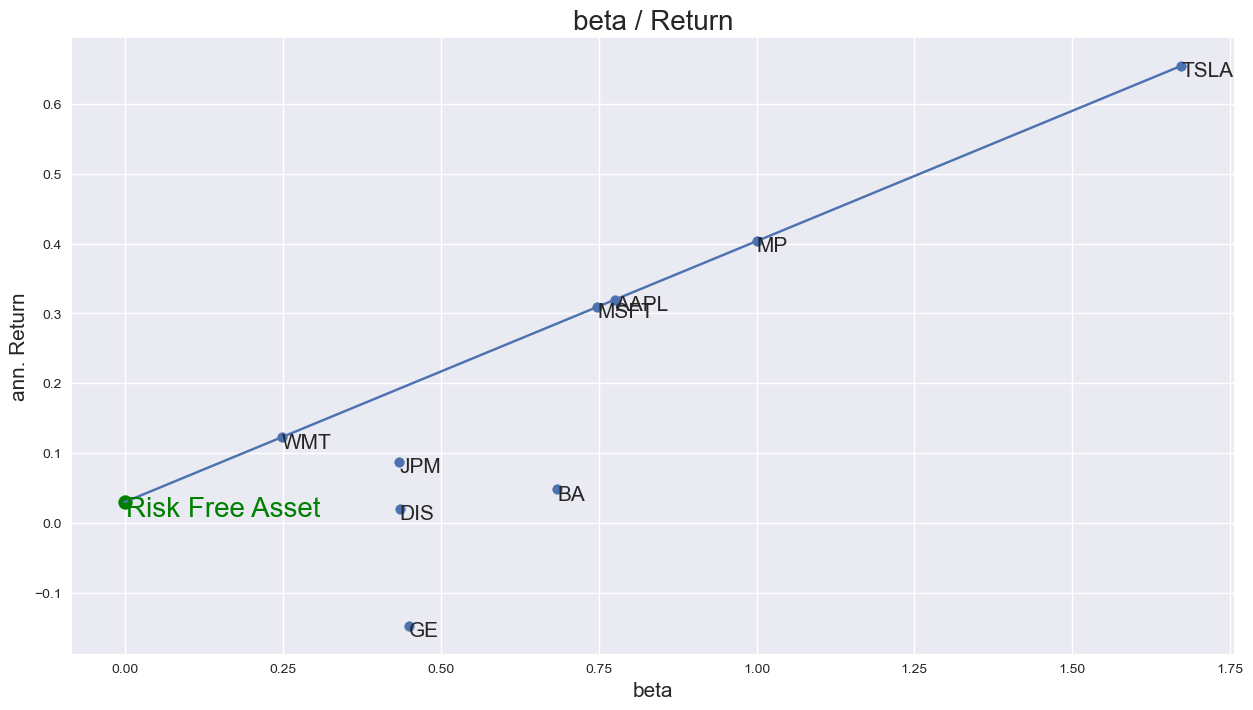

In [44]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["TSLA", "beta"]], [rf[0],rf[0] + summary.loc["TSLA", "beta"]*(summary.loc["MP", "ann. Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

Positive Alpha: Overperformance <br>
Negative Alpha : Underperformance

(Sometimes, Alpha is describes as: Alpha = Investment Return - Market Return; This doesn´t take into account risk!)

---

# Using a more suitable Market Portfolio

- __Motivation:__ CAPM can be helpful to predict stock returns. (ex ante)
- __Motivation__: CAPM can be helpful to measure and assess single Stock Performance (Benchmarking)

In [95]:
prices

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.8750,198.5900,107.4600,211.1538,92.7500,68.1700,23.5080,75.3600
2017-07-05,36.0225,201.8100,105.6300,210.3846,93.6800,69.0800,21.8060,75.3200
2017-07-06,35.6825,201.4800,103.3500,202.3846,93.3800,68.5700,20.5887,75.4700
2017-07-07,36.0450,202.3700,103.3200,201.1538,93.8500,69.4600,20.8813,75.3300
2017-07-10,36.2650,203.9600,103.5900,200.3077,93.1900,69.9800,21.0700,73.2300
...,...,...,...,...,...,...,...,...
2022-06-24,141.6600,141.5300,97.7800,67.0800,117.3200,267.7000,245.7067,123.7200
2022-06-27,141.6600,138.7200,96.6100,66.7100,116.3800,264.8900,244.9200,124.1200
2022-06-28,137.4400,138.7000,95.9200,65.8800,115.8200,256.4800,232.6633,122.3700


In [96]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005,0.0015
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020,-0.0094
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019,0.0064
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279,0.0009
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033,-0.0008
...,...,...,...,...,...,...,...,...,...
2022-06-23,0.0216,-0.0233,0.0086,-0.0073,-0.0109,0.0226,-0.0043,0.0243,0.0095
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008,0.0306
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032,-0.0030


In [97]:
start = prices.index[0]
end = prices.index[-1]

In [98]:
import yfinance as yf

__approximation for Market Portfolio: S&P 500 Index (US Stocks)__

In [99]:
# So let's download the SP500 index. 
market = yf.download("^GSPC", start = start, end = end, ignore_tz = True)
market

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-03,2431.3899,2439.1699,2428.6899,2429.0100,2429.0100,1901480000
2017-07-05,2430.7800,2434.8999,2422.0500,2432.5400,2432.5400,3368150000
2017-07-06,2423.4399,2424.2800,2407.7000,2409.7500,2409.7500,3368710000
2017-07-07,2413.5200,2426.9199,2413.5200,2425.1799,2425.1799,2929390000
2017-07-10,2424.5100,2432.0000,2422.2700,2427.4299,2427.4299,3009880000
...,...,...,...,...,...,...
2022-06-23,3774.7100,3802.5801,3743.5200,3795.7300,3795.7300,5098640000
2022-06-24,3821.7500,3913.6499,3821.7500,3911.7400,3911.7400,8120260000
2022-06-27,3920.7600,3927.7200,3889.6599,3900.1101,3900.1101,4325310000


In [100]:
# Add the return of the Market portfolio (SP500) to the returns DataFrame 
returns["MP"] = market.Close.pct_change()
returns.dropna(inplace = True)
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005,0.0015
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020,-0.0094
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019,0.0064
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279,0.0009
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033,-0.0008
...,...,...,...,...,...,...,...,...,...
2022-06-23,0.0216,-0.0233,0.0086,-0.0073,-0.0109,0.0226,-0.0043,0.0243,0.0095
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008,0.0306
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032,-0.0030


In [101]:
# Compute the annualize risk & return 
summary = ann_risk_return(returns)
summary

,ann. Risk,ann. Return
AAPL,0.3207,0.3237
BA,0.4960,0.0507
DIS,0.3070,0.0234
GE,0.4321,-0.1470
JPM,0.3122,0.0923
MSFT,0.2942,0.3122
TSLA,0.6369,0.6586
WMT,0.2312,0.1232
MP,0.2071,0.1124


In [102]:
# risk free return 
rf = [0.03, 0]

In [103]:
# Compute the annualize covariance matrix
cov_matrix = returns.cov() * 252
cov_matrix

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
AAPL,0.1029,0.0674,0.0439,0.0473,0.0461,0.0715,0.0926,0.0264,0.0522
BA,0.0674,0.2460,0.0830,0.1191,0.0952,0.0615,0.1030,0.0190,0.0654
DIS,0.0439,0.0830,0.0942,0.0606,0.0587,0.0441,0.0566,0.0170,0.0422
GE,0.0473,0.1191,0.0606,0.1867,0.0778,0.0413,0.0635,0.0145,0.0492
JPM,0.0461,0.0952,0.0587,0.0778,0.0975,0.0450,0.0526,0.0190,0.0483
MSFT,0.0715,0.0615,0.0441,0.0413,0.0450,0.0866,0.0852,0.0268,0.0515
TSLA,0.0926,0.1030,0.0566,0.0635,0.0526,0.0852,0.4056,0.0210,0.0616
WMT,0.0264,0.0190,0.0170,0.0145,0.0190,0.0268,0.0210,0.0534,0.0217
MP,0.0522,0.0654,0.0422,0.0492,0.0483,0.0515,0.0616,0.0217,0.0429


In [108]:
# Compute metrices (for each asset)

# Sharp ratio
summary["Sharpe"] = (summary["ann. Return"] - rf[0]) / summary["ann. Risk"]
# Total risk (variance)
summary["TotalRisk_var"] = summary["ann. Risk"]**2
# Systematic risk (Weigted avarage of covariance of assets with the MP)
summary["SystRisk_var"] = cov_matrix.iloc[:, -1]
# Unsystematic risk  
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
# beta
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
# CAPM
summary["capm_ret"] = rf[0] + (summary.loc["MP", "ann. Return"] - rf[0]) * summary.beta
# alpha
summary["alpha"] = summary["ann. Return"] - summary.capm_ret

In [105]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,0.3207,0.3237,0.9157,0.1029,0.0522,0.0507,1.2172,0.1303,0.1935
BA,0.4960,0.0507,0.0417,0.2460,0.0654,0.1806,1.5244,0.1556,-0.1049
DIS,0.3070,0.0234,-0.0215,0.0942,0.0422,0.0520,0.9850,0.1111,-0.0877
GE,0.4321,-0.1470,-0.4096,0.1867,0.0492,0.1375,1.1478,0.1245,-0.2716
JPM,0.3122,0.0923,0.1994,0.0975,0.0483,0.0491,1.1276,0.1229,-0.0306
MSFT,0.2942,0.3122,0.9592,0.0866,0.0515,0.0351,1.2004,0.1289,0.1834
TSLA,0.6369,0.6586,0.9870,0.4056,0.0616,0.3440,1.4376,0.1484,0.5102
WMT,0.2312,0.1232,0.4031,0.0534,0.0217,0.0317,0.5057,0.0717,0.0515
MP,0.2071,0.1124,0.3978,0.0429,0.0429,0.0000,1.0000,0.1124,0.0000


__Plot the Beta and the ann return and see where the assets/MP relative to the securitry line__

- The assets __above the security market line__ (alpha > 0) outpreform MP! 
- The assets __under the security market line__ (alpha < 0) underpreform MP! 

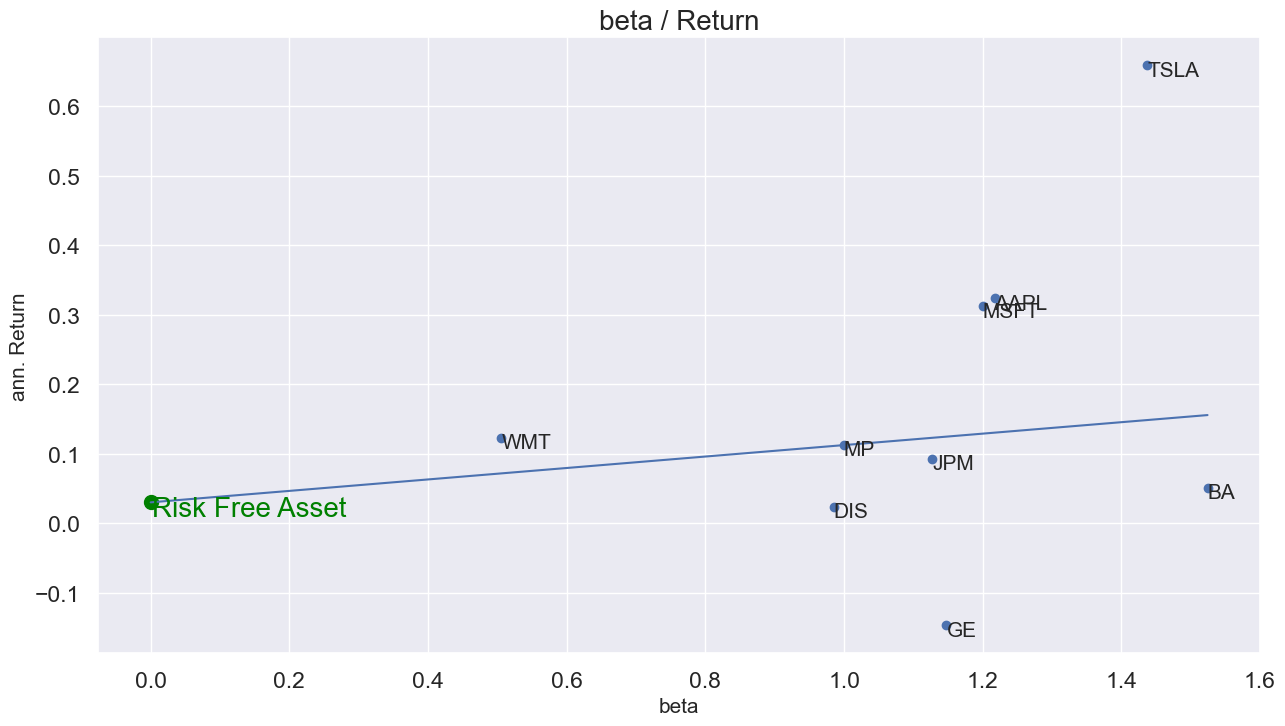

In [106]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["BA", "beta"]], [rf[0],rf[0] + summary.loc["BA", "beta"]*(summary.loc["MP", "ann. Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

Positive Alpha: Overperformance -> underweighted in Market Portfolio <br>
Negative Alpha : Underperformance -> overweighted in Market Portfolio

__Plot the systematic / unsystematic risk__
- We can see clearly that the SP-500 reduce the risk of each individual asset!

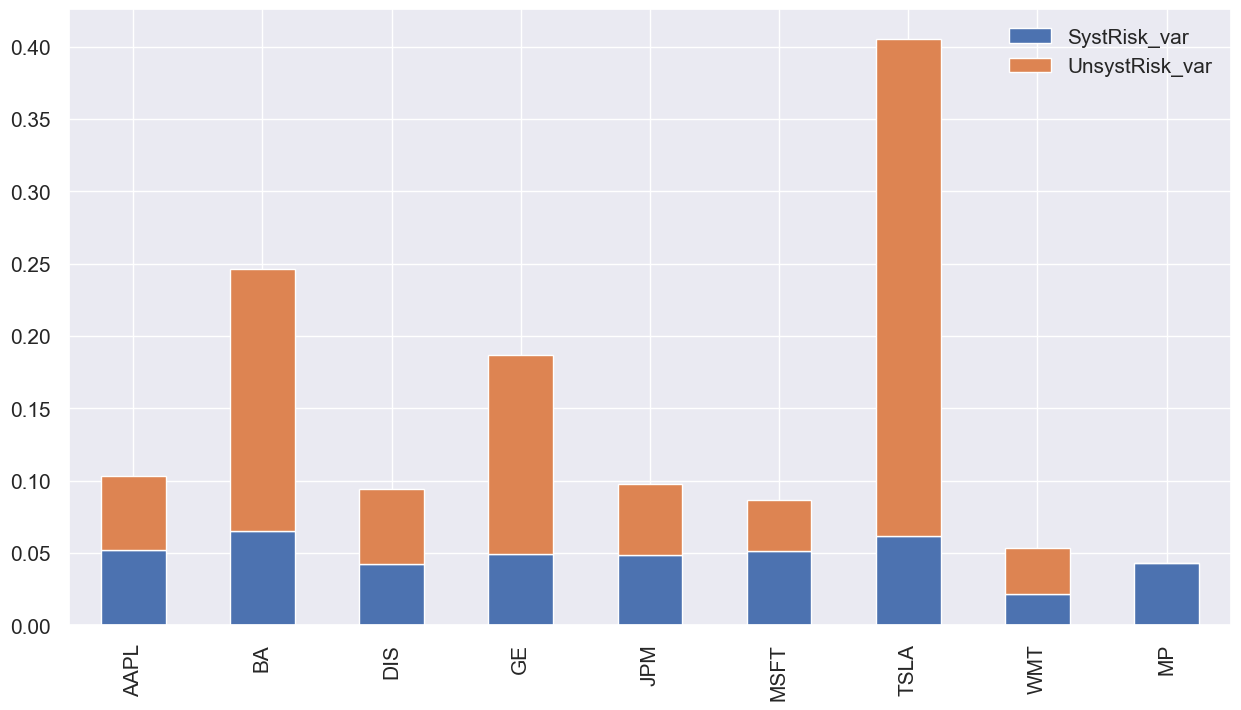

In [107]:
summary.iloc[:, 4:6].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

---

# More on Beta

__What is beta and how to interpret beta?__

In [109]:
import scipy.stats as stats

In [110]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005,0.0015
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020,-0.0094
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019,0.0064
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279,0.0009
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033,-0.0008
...,...,...,...,...,...,...,...,...,...
2022-06-23,0.0216,-0.0233,0.0086,-0.0073,-0.0109,0.0226,-0.0043,0.0243,0.0095
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008,0.0306
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032,-0.0030


A Stock´s beta is the __slope of the Linear Regression Line__ between Market Returns (x) and the Stock´s returns (y)

y = i  + slope     * x

Stock Returns = intercept + beta * market returns

In [111]:
# Compute the linear regression between Market Portfolio returns (x) 
# to the AAPL returns (y)

beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = returns.MP,
                                                          y = returns.AAPL)

In [112]:
beta

1.2171900618508353

In [113]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,0.3207,0.3237,0.9157,0.1029,0.0522,0.0507,1.2172,0.1303,0.1935
BA,0.4960,0.0507,0.0417,0.2460,0.0654,0.1806,1.5244,0.1556,-0.1049
DIS,0.3070,0.0234,-0.0215,0.0942,0.0422,0.0520,0.9850,0.1111,-0.0877
GE,0.4321,-0.1470,-0.4096,0.1867,0.0492,0.1375,1.1478,0.1245,-0.2716
JPM,0.3122,0.0923,0.1994,0.0975,0.0483,0.0491,1.1276,0.1229,-0.0306
MSFT,0.2942,0.3122,0.9592,0.0866,0.0515,0.0351,1.2004,0.1289,0.1834
TSLA,0.6369,0.6586,0.9870,0.4056,0.0616,0.3440,1.4376,0.1484,0.5102
WMT,0.2312,0.1232,0.4031,0.0534,0.0217,0.0317,0.5057,0.0717,0.0515
MP,0.2071,0.1124,0.3978,0.0429,0.0429,0.0000,1.0000,0.1124,0.0000


In [114]:
import seaborn as sns

Plot the linear regression of __AAPL return__ and the __Market Portfolio return__

- Its clear that the is positive linear relationship.

So the slope (beta) is the best line that represent the relationship between the __AAPL return__ and the __Market Portfolio return__.

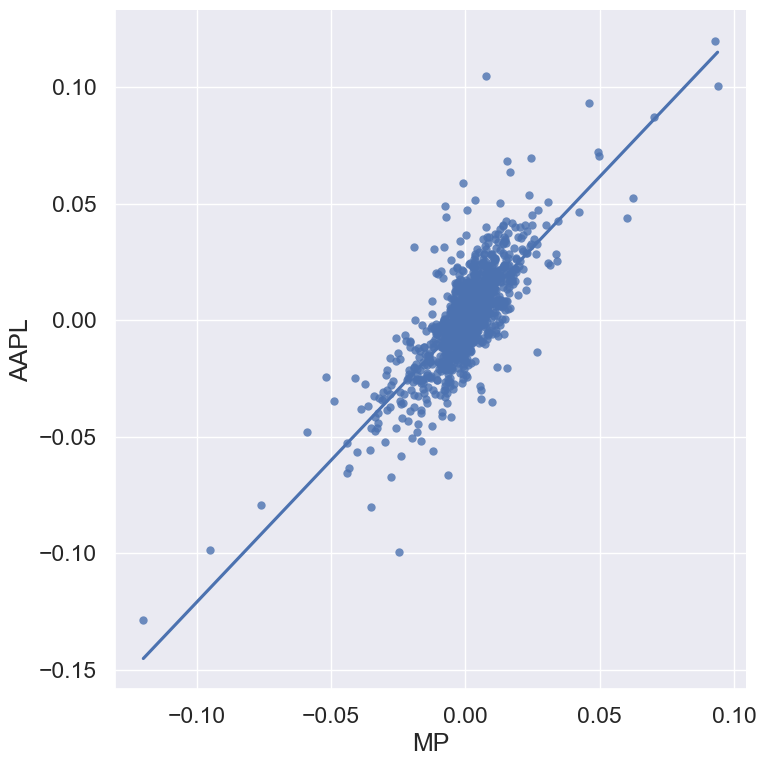

In [115]:
sns.set(font_scale=1.5)
sns.lmplot(data = returns, x = "MP", y = "AAPL", height = 8, ci = None)
plt.show()

__Interpretation of beta__

- (beta = 1.5): If Market Return increases by 2%, the Stock´s Return is expected to increase by 3% (1.5 * 2)
- (beta = 0.5): If Market Return increases by 2%, the Stock´s Return is expected to increase by 1% (0.5 * 2)

__beta > 1:__

__Cyclical Stock__ (overreacting the market) -> Luxury Goods, __Consumer Discretionary__ (Cars, Leisure)

__beta < 1:__

__Non-Cyclical (defensive) Stock__ (underreacting the market) -> __Consumer Staples__ (Food, Clothing)

__Simple Investment Strategy__:
- Increase Portfolio beta in economic upswing
- Reduce Portfolio beta in economic downturn / recession 

__Alternative Regression:__ <br>
y = i  + slope     * x <br>
(Stock Returns - risk-free rate) = alpha + beta * (market returns - risk-free rate)

__-> intercept == alpha__

In [116]:
beta, alpha, rvalue, pvalue, stderr = stats.linregress(x = (returns.MP * 252 - 0.03),
                                                       y = (returns.AAPL * 252 - 0.03))

In [117]:
beta

1.2171900618508353

In [118]:
alpha

0.19345664929496542

In [119]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,0.3207,0.3237,0.9157,0.1029,0.0522,0.0507,1.2172,0.1303,0.1935
BA,0.4960,0.0507,0.0417,0.2460,0.0654,0.1806,1.5244,0.1556,-0.1049
DIS,0.3070,0.0234,-0.0215,0.0942,0.0422,0.0520,0.9850,0.1111,-0.0877
GE,0.4321,-0.1470,-0.4096,0.1867,0.0492,0.1375,1.1478,0.1245,-0.2716
JPM,0.3122,0.0923,0.1994,0.0975,0.0483,0.0491,1.1276,0.1229,-0.0306
MSFT,0.2942,0.3122,0.9592,0.0866,0.0515,0.0351,1.2004,0.1289,0.1834
TSLA,0.6369,0.6586,0.9870,0.4056,0.0616,0.3440,1.4376,0.1484,0.5102
WMT,0.2312,0.1232,0.4031,0.0534,0.0217,0.0317,0.5057,0.0717,0.0515
MP,0.2071,0.1124,0.3978,0.0429,0.0429,0.0000,1.0000,0.1124,0.0000


---

# Forecasting Stock Returns with CAPM

__Idea: Ex-ante (forward-looking) all Stocks should be located on the Security Market Line (SML)__

__Implicit Assumptions__:
- Semi-strong EMH holds
- Homogeneous Expectations (market consensus)
- Investors act rationally

__Forward-looking CAPM:__

Exp. Return = RFR + (Exp. Market Portfolio Return  - RFR) * beta

- RFR: Short Term Treasury Bond/Note Rate
- Expected Market Return 
- beta Forecast

__Can we use past beta as an estimate for the future beta?__

In [120]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005,0.0015
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020,-0.0094
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019,0.0064
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279,0.0009
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033,-0.0008
...,...,...,...,...,...,...,...,...,...
2022-06-23,0.0216,-0.0233,0.0086,-0.0073,-0.0109,0.0226,-0.0043,0.0243,0.0095
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008,0.0306
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032,-0.0030


__3Y Rolling Beta__

In [121]:
# Compute the rolling bate. 
rolling_beta = returns.AAPL.rolling(3 * 252).cov(returns.MP) / returns.MP.rolling(3 * 252).var()
rolling_beta

Date
2017-07-05      NaN
2017-07-06      NaN
2017-07-07      NaN
2017-07-10      NaN
2017-07-11      NaN
              ...  
2022-06-23   1.1864
2022-06-24   1.1839
2022-06-27   1.1841
2022-06-28   1.1850
2022-06-29   1.1854
Length: 1256, dtype: float64

__Plot the rolling beta of AAPL__

__Interpretation:__
- We can see that the beta is stabel over the time.
- Its mean that we can "trust" on the current `beta` of AAPL. its mean that we can "~know" the return of AAPL in future

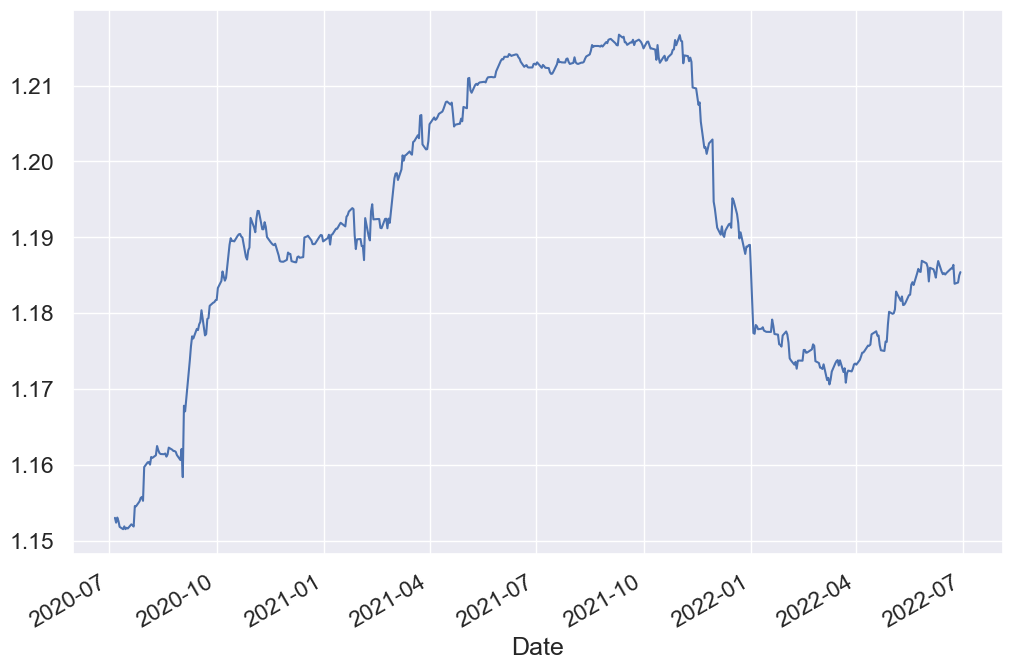

In [122]:
rolling_beta.plot(figsize = (12, 8))
plt.show()

- beta relatively stable over time
- past beta can be used as approx. for future beta

__Getting a stock´s beta from yahoo finance__

In [123]:
import yfinance as yf

In [124]:
ticker = yf.Ticker("AAPL")

In [135]:
info = ticker.get_info()
info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [ ]:
beta = info["beta"] # based on 5Y monthly data
beta

__Getting RFR__

In [129]:
# 13 Week US Treasury Bill
# Rist Free Return 
rfr = yf.download(tickers = "^IRX").Close.dropna().iloc[-1] / 100 
rfr

[*********************100%%**********************]  1 of 1 completed


0.0525

__Market Return Estimate__

In [130]:
rm = 0.10 # market forecast 10% 
rm

0.1

__Stock Return Forecast with CAPM__

In [131]:
# risk free return + expected market return * the asset beta 
aapl_ret = rfr + (rm - rfr) * beta
aapl_ret

0.11031652793791469